<a href="https://colab.research.google.com/github/lakatosgabor/OpenCV_gyakorlat/blob/main/VGG16_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm # for progress bar

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow import keras

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


In [95]:
# Loading dataset from keras

(xtrain,ytrain),(xtest,ytest)= keras.datasets.mnist.load_data()

In [96]:
# Verifying dataset
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


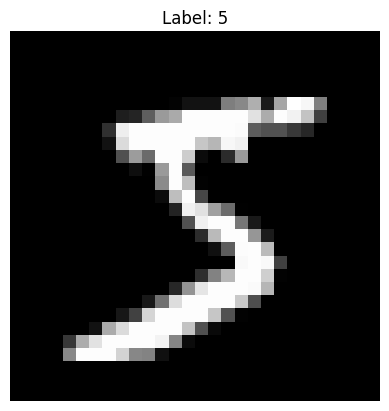

In [97]:
# Kép megjelenítése az index alapján
index = 0  # Válaszd ki a megjeleníteni kívánt kép indexét
plt.imshow(xtrain[index], cmap='gray')  # Kép megjelenítése szürkeárnyalatosként
plt.title(f"Label: {ytrain[index]}")  # Cím hozzáadása a képhez a címkével
plt.axis('off')  # Kép tengelyének kikapcsolása
plt.show()  # Kép megjelenítése

In [98]:
new_size = int(len(xtrain) * 0.1)
xtrain_reduced = xtrain[:new_size]
ytrain_reduced = ytrain[:new_size]

xtrain = xtrain_reduced
ytrain = ytrain_reduced

# Az új adatok ellenőrzése
print("Csökkentett xtrain méret:", xtrain.shape)
print("Csökkentett ytrain méret:", ytrain.shape)


new_size = int(len(xtest) * 0.2)
xtest_reduced = xtest[:new_size]
ytest_reduced = ytest[:new_size]

xtest = xtest_reduced
ytest = ytest_reduced

# Az új adatok ellenőrzése
print("Csökkentett xtest méret:", xtest.shape)
print("Csökkentett ytest méret:", ytest.shape)

Csökkentett xtrain méret: (6000, 28, 28)
Csökkentett ytrain méret: (6000,)
Csökkentett xtest méret: (2000, 28, 28)
Csökkentett ytest méret: (2000,)


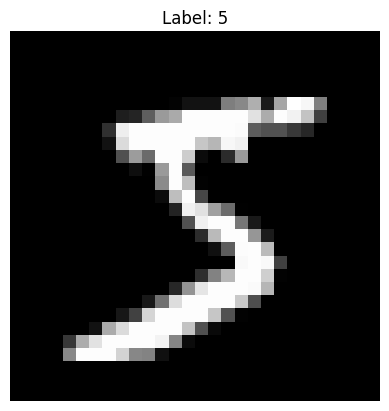

In [99]:
# Kép megjelenítése az index alapján
index = 0  # Válaszd ki a megjeleníteni kívánt kép indexét
plt.imshow(xtrain[index], cmap='gray')  # Kép megjelenítése szürkeárnyalatosként
plt.title(f"Label: {ytrain[index]}")  # Cím hozzáadása a képhez a címkével
plt.axis('off')  # Kép tengelyének kikapcsolása
plt.show()  # Kép megjelenítése

In [100]:
# Színes csatornák hozzáadása

#új dimenziót ad hozzá az xtrain tömbhöz az utolsó dimenzió végére
#Az axis=-1 azt jelzi, hogy a dimenzió a legutolsó pozícióban kerül hozzáadásra.
xtrain = np.expand_dims(xtrain, axis=-1)

#az előző lépésben hozzáadott dimenziót háromszorosítja, hogy három színcsatornát
#(RGB: vörös, zöld, kék) adjon minden képhez
xtrain = np.repeat(xtrain, 3, axis=-1)

xtest = np.expand_dims(xtest, axis=-1)
xtest = np.repeat(xtest, 3, axis=-1)

print(xtrain.shape, xtest.shape)

(6000, 28, 28, 3) (2000, 28, 28, 3)


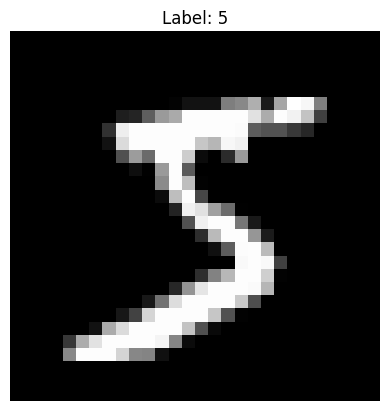

In [101]:
# Kép megjelenítése az index alapján
index = 0  # Válaszd ki a megjeleníteni kívánt kép indexét
plt.imshow(xtrain[index], cmap='gray')  # Kép megjelenítése szürkeárnyalatosként
plt.title(f"Label: {ytrain[index]}")  # Cím hozzáadása a képhez a címkével
plt.axis('off')  # Kép tengelyének kikapcsolása
plt.show()  # Kép megjelenítése

In [102]:
# Reshape images as per the tensor format required by tensorflow

xtrain = xtrain.reshape(-1, 28,28,3)
xtest= xtest.reshape (-1,28,28,3)
xtrain.shape,xtest.shape

((6000, 28, 28, 3), (2000, 28, 28, 3))

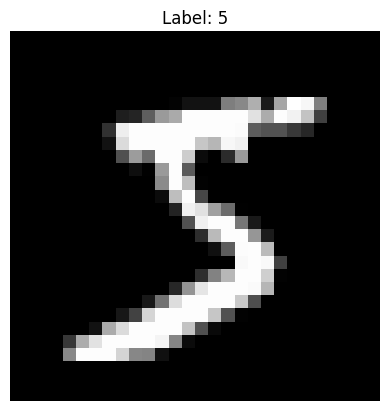

In [103]:

# Kép megjelenítése az index alapján
index = 0  # Válaszd ki a megjeleníteni kívánt kép indexét
plt.imshow(xtrain[index], cmap='gray')  # Kép megjelenítése szürkeárnyalatosként
plt.title(f"Label: {ytrain[index]}")  # Cím hozzáadása a képhez a címkével
plt.axis('off')  # Kép tengelyének kikapcsolása
plt.show()  # Kép megjelenítése

In [104]:
# Resize the images 48*48 as required by VGG16

from keras.preprocessing.image import img_to_array, array_to_img

xtrain = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtrain])
xtest = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtest])
#train_x = preprocess_input(x)
xtrain.shape, xtest.shape

((6000, 48, 48, 3), (2000, 48, 48, 3))

In [105]:
# # listing the folders containing images

# preparing array that can be used later

class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(class_names)

val_class_names =['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(val_class_names)

test_class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(test_class_names)

# Function to know the name of the element

def Get_Element_Name(argument):
    switcher = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    return switcher.get(argument, "Invalid")

print(Get_Element_Name(0))

['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
Zero


In [106]:
# Preparing data

x=[] # to store array value of the images
x=xtrain
y=[] # to store the labels of the images
y=ytrain

test_images=[]
test_images=xtest
test_images_Original=[]
test_images_Original=xtest
test_image_label=[] # to store the labels of the images
test_image_label=ytest

val_images=[]
val_images=xtest
val_images_Original=[]
val_images_Original=xtest
val_image_label=[] # to store the labels of the images
val_image_label=ytest # to store the labels of the images

print("Preparing Dataset Completed.")

Preparing Dataset Completed.


In [107]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

# Test Dataset
print("Test Dataset")

test_images=np.array(test_images)
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images)
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(6000, 48, 48, 3)
(6000, 10)
Test Dataset
(2000, 48, 48, 3)
(2000, 10)
Validation Dataset
(2000, 48, 48, 3)
(2000, 10)


In [108]:
# Check properties of the model that we are going to use for Transfer Learning

print("Summary of default VGG16 model.\n")

# we are using VGG16 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import VGG16

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_vgg16=VGG16(weights='imagenet')

# display the summary to see the properties of the model
model_vgg16.summary()

Summary of default VGG16 model.

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D) 

In [109]:
# Modelling WITH Transfer Learning

# Here we will prepare model as per our requirements

print("Summary of Custom VGG16 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (48,48,3)
input_layer=layers.Input(shape=(48,48,3))

# initialize the transfer model VGG16 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the VGG16 using input_tensor
# 3) we want to change the last layer so we are not including top layer
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
model_vgg16.summary()

Summary of Custom VGG16 model.

1) We setup input layer and 2) We removed top (last) layer. 

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                 

In [110]:
# access the current last layer of the model and add flatten and dense after it

print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer)

# Add dense layer to the final output layer
output_layer=layers.Dense(10,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom VGG16 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                   

In [111]:
# we will freez all the layers except the last layer

# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                           

In [112]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
# print(xtrain)
# print(xtest)
# print(ytrain)
# print(ytest)

print("Splitting data for train and test completed.")

Splitting data for train and test completed.


In [113]:
# Compiling Model

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")
model.summary()

Model compilation completed.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (

In [114]:
# Fit the Model

history = model.fit(xtrain,ytrain,epochs=4,batch_size=128,verbose=True,validation_data=(xtest,ytest))
print("Fitting the model completed.")

Epoch 1/4
38/38 [==============================] - 4s 70ms/step - loss: 7.3096 - accuracy: 0.2581 - val_loss: 3.2934 - val_accuracy: 0.4192
Epoch 2/4
38/38 [==============================] - 2s 41ms/step - loss: 1.9918 - accuracy: 0.5721 - val_loss: 1.4637 - val_accuracy: 0.6425
Epoch 3/4
38/38 [==============================] - 2s 40ms/step - loss: 1.0442 - accuracy: 0.7300 - val_loss: 0.9967 - val_accuracy: 0.7400
Epoch 4/4
38/38 [==============================] - 1s 38ms/step - loss: 0.7310 - accuracy: 0.7956 - val_loss: 0.7985 - val_accuracy: 0.7767
Fitting the model completed.


In [115]:
# This function helps to predict individual image supplied to it

# Function 1

def predict(img_name):
    img=image.load_img(img_name,target_size=(48,48))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)

    prediction=model.predict(img.reshape(1,48,48,3))
    output=np.argmax(prediction)

    print(class_names[output] + ": " + Get_Element_Name(class_names[output]))


# Function 2

# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array

    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.astype('int32'))

    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour

    plt.xlabel("{} {:2.0f}% \n ({})".format(Get_Element_Name(predicted_label),
                                            100*np.max(predictions_array), Get_Element_Name(true_label),
                                            color=color, horizontalalignment='left'))


#     plt.xlabel("{} {:2.0f}% ({})".format(val_class_names[predicted_label],
#                                          100*np.max(predictions_array), val_class_names[true_label]),
#                                          color=color)


# Function 3

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1

    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [116]:
# Preparing prediction arrary
predictions=[]

for img in tqdm(val_images):
    img=img.reshape(1,48,48,3)
    predictions.append(model.predict(img))

  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 134ms/step


  0%|          | 1/2000 [00:00<06:24,  5.21it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 3/2000 [00:00<03:10, 10.47it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 5/2000 [00:00<02:28, 13.44it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 7/2000 [00:00<02:11, 15.17it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 9/2000 [00:00<02:01, 16.33it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 11/2000 [00:00<01:55, 17.22it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 13/2000 [00:00<01:54, 17.29it/s]

1/1 [==============================] - 0s 16ms/step


  1%|          | 15/2000 [00:00<01:50, 17.90it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 17/2000 [00:01<01:49, 18.15it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 19/2000 [00:01<01:53, 17.51it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 21/2000 [00:01<01:56, 17.01it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 23/2000 [00:01<01:55, 17.10it/s]

1/1 [==============================] - 0s 18ms/step


  1%|▏         | 25/2000 [00:01<01:54, 17.28it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▏         | 27/2000 [00:01<01:52, 17.61it/s]

1/1 [==============================] - 0s 34ms/step


  1%|▏         | 29/2000 [00:01<01:54, 17.28it/s]

1/1 [==============================] - 0s 40ms/step


  2%|▏         | 31/2000 [00:01<02:11, 14.93it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 33/2000 [00:02<02:17, 14.27it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 35/2000 [00:02<02:25, 13.49it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 37/2000 [00:02<02:31, 12.96it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 39/2000 [00:02<02:35, 12.62it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 41/2000 [00:02<02:33, 12.76it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 43/2000 [00:02<02:33, 12.76it/s]

1/1 [==============================] - 0s 40ms/step


  2%|▏         | 45/2000 [00:03<02:40, 12.18it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 47/2000 [00:03<02:43, 11.97it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 49/2000 [00:03<02:44, 11.84it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 51/2000 [00:03<02:40, 12.15it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 53/2000 [00:03<02:37, 12.35it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 55/2000 [00:03<02:36, 12.42it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 57/2000 [00:04<02:35, 12.51it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 59/2000 [00:04<02:38, 12.22it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 61/2000 [00:04<02:36, 12.36it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 63/2000 [00:04<02:36, 12.35it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 65/2000 [00:04<02:36, 12.40it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 67/2000 [00:04<02:41, 11.95it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 69/2000 [00:05<02:43, 11.78it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▎         | 71/2000 [00:05<02:40, 11.99it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 73/2000 [00:05<02:41, 11.95it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 75/2000 [00:05<02:39, 12.08it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 77/2000 [00:05<02:41, 11.92it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 79/2000 [00:05<02:43, 11.78it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 81/2000 [00:06<02:40, 11.96it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 83/2000 [00:06<02:37, 12.18it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 85/2000 [00:06<02:38, 12.09it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 87/2000 [00:06<02:35, 12.28it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 89/2000 [00:06<02:33, 12.46it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 91/2000 [00:06<02:31, 12.59it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▍         | 93/2000 [00:07<02:28, 12.81it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▍         | 95/2000 [00:07<02:30, 12.65it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 97/2000 [00:07<02:33, 12.41it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 99/2000 [00:07<02:38, 11.99it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 101/2000 [00:07<02:36, 12.12it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 103/2000 [00:07<02:42, 11.70it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 105/2000 [00:08<02:32, 12.44it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 107/2000 [00:08<02:18, 13.63it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 109/2000 [00:08<02:08, 14.76it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 111/2000 [00:08<01:59, 15.74it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 113/2000 [00:08<01:58, 15.89it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 115/2000 [00:08<01:53, 16.57it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 117/2000 [00:08<01:50, 17.09it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 119/2000 [00:08<01:50, 16.98it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 121/2000 [00:08<01:51, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 123/2000 [00:09<01:51, 16.86it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▋         | 125/2000 [00:09<01:50, 16.98it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 127/2000 [00:09<01:51, 16.79it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▋         | 129/2000 [00:09<01:52, 16.64it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 131/2000 [00:09<01:54, 16.38it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 133/2000 [00:09<01:52, 16.59it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 135/2000 [00:09<01:49, 16.97it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 137/2000 [00:09<01:50, 16.90it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 139/2000 [00:10<01:55, 16.13it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 141/2000 [00:10<01:55, 16.06it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 143/2000 [00:10<01:52, 16.44it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 145/2000 [00:10<01:48, 17.06it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 147/2000 [00:10<01:50, 16.76it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 149/2000 [00:10<01:48, 17.03it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 151/2000 [00:10<01:46, 17.43it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 153/2000 [00:10<01:44, 17.70it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 155/2000 [00:10<01:43, 17.86it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 157/2000 [00:11<01:43, 17.76it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 159/2000 [00:11<01:44, 17.59it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 161/2000 [00:11<01:44, 17.56it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 163/2000 [00:11<01:44, 17.62it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 165/2000 [00:11<01:52, 16.36it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 167/2000 [00:11<01:51, 16.51it/s]

1/1 [==============================] - 0s 16ms/step


  8%|▊         | 169/2000 [00:11<01:47, 16.98it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 171/2000 [00:11<01:46, 17.16it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 173/2000 [00:11<01:46, 17.20it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 175/2000 [00:12<01:46, 17.16it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 177/2000 [00:12<01:45, 17.36it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 179/2000 [00:12<01:44, 17.50it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 181/2000 [00:12<01:43, 17.56it/s]

1/1 [==============================] - 0s 16ms/step


  9%|▉         | 183/2000 [00:12<01:44, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 185/2000 [00:12<01:48, 16.80it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 187/2000 [00:12<01:47, 16.84it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 189/2000 [00:12<01:46, 16.97it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 191/2000 [00:13<01:46, 16.93it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 193/2000 [00:13<01:46, 16.92it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 195/2000 [00:13<01:48, 16.70it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 197/2000 [00:13<01:47, 16.78it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 199/2000 [00:13<01:47, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 201/2000 [00:13<01:47, 16.75it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 203/2000 [00:13<01:46, 16.88it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 205/2000 [00:13<01:49, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 207/2000 [00:14<01:53, 15.86it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 209/2000 [00:14<01:53, 15.84it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 211/2000 [00:14<01:53, 15.77it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 213/2000 [00:14<01:51, 15.99it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 215/2000 [00:14<01:48, 16.40it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 217/2000 [00:14<01:49, 16.21it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 219/2000 [00:14<01:47, 16.53it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 221/2000 [00:14<01:47, 16.62it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 223/2000 [00:14<01:47, 16.53it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█▏        | 225/2000 [00:15<01:44, 16.97it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 227/2000 [00:15<01:44, 16.98it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 229/2000 [00:15<01:45, 16.76it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 231/2000 [00:15<01:44, 16.88it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 233/2000 [00:15<01:46, 16.56it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 235/2000 [00:15<01:44, 16.86it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 237/2000 [00:15<01:45, 16.68it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 239/2000 [00:15<01:44, 16.89it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 241/2000 [00:16<01:43, 17.06it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 243/2000 [00:16<01:43, 16.96it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 245/2000 [00:16<01:44, 16.87it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 247/2000 [00:16<01:45, 16.68it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 249/2000 [00:16<01:42, 17.02it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 251/2000 [00:16<01:45, 16.61it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 253/2000 [00:16<01:43, 16.92it/s]

1/1 [==============================] - 0s 16ms/step


 13%|█▎        | 255/2000 [00:16<01:41, 17.12it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 257/2000 [00:17<01:43, 16.85it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 259/2000 [00:17<01:43, 16.90it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 261/2000 [00:17<01:45, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 263/2000 [00:17<01:46, 16.37it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 265/2000 [00:17<01:47, 16.13it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█▎        | 267/2000 [00:17<01:49, 15.77it/s]

1/1 [==============================] - 0s 17ms/step


 13%|█▎        | 269/2000 [00:17<01:46, 16.28it/s]

1/1 [==============================] - 0s 16ms/step


 14%|█▎        | 271/2000 [00:17<01:42, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 273/2000 [00:17<01:42, 16.93it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 275/2000 [00:18<01:54, 15.01it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 277/2000 [00:18<02:01, 14.16it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 279/2000 [00:18<02:04, 13.77it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 281/2000 [00:18<02:07, 13.51it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█▍        | 283/2000 [00:18<02:13, 12.86it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█▍        | 285/2000 [00:18<02:18, 12.39it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 287/2000 [00:19<02:21, 12.11it/s]

1/1 [==============================] - 0s 34ms/step


 14%|█▍        | 289/2000 [00:19<02:28, 11.54it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 291/2000 [00:19<02:24, 11.84it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▍        | 293/2000 [00:19<02:28, 11.47it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 295/2000 [00:19<02:27, 11.55it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 297/2000 [00:20<02:24, 11.80it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 299/2000 [00:20<02:20, 12.07it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▌        | 301/2000 [00:20<02:25, 11.71it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 303/2000 [00:20<02:26, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 305/2000 [00:20<02:24, 11.71it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▌        | 307/2000 [00:20<02:25, 11.63it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 309/2000 [00:21<02:28, 11.42it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 311/2000 [00:21<02:31, 11.13it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 313/2000 [00:21<02:27, 11.40it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 315/2000 [00:21<02:24, 11.67it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 317/2000 [00:21<02:20, 12.00it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 319/2000 [00:21<02:22, 11.79it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 321/2000 [00:22<02:23, 11.68it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 323/2000 [00:22<02:17, 12.20it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▋        | 325/2000 [00:22<02:15, 12.40it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▋        | 327/2000 [00:22<02:15, 12.39it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▋        | 329/2000 [00:22<02:18, 12.07it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 331/2000 [00:22<02:16, 12.18it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 333/2000 [00:23<02:17, 12.11it/s]

1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 335/2000 [00:23<02:14, 12.34it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 337/2000 [00:23<02:11, 12.61it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 339/2000 [00:23<02:14, 12.33it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 341/2000 [00:23<02:15, 12.23it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 343/2000 [00:23<02:18, 12.00it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 345/2000 [00:24<02:18, 11.99it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 347/2000 [00:24<02:15, 12.24it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 349/2000 [00:24<02:17, 11.98it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 351/2000 [00:24<02:10, 12.64it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 353/2000 [00:24<01:58, 13.89it/s]

1/1 [==============================] - 0s 16ms/step


 18%|█▊        | 355/2000 [00:24<01:51, 14.81it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 357/2000 [00:24<01:46, 15.46it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 359/2000 [00:24<01:43, 15.90it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 361/2000 [00:25<01:40, 16.38it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 363/2000 [00:25<01:40, 16.33it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 365/2000 [00:25<01:39, 16.42it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 367/2000 [00:25<01:40, 16.31it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 369/2000 [00:25<01:38, 16.51it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 371/2000 [00:25<01:38, 16.57it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▊        | 373/2000 [00:25<01:37, 16.75it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 375/2000 [00:25<01:37, 16.67it/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▉        | 377/2000 [00:26<01:38, 16.55it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 379/2000 [00:26<01:35, 16.95it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 381/2000 [00:26<01:37, 16.66it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 383/2000 [00:26<01:35, 16.96it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 385/2000 [00:26<01:38, 16.38it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 387/2000 [00:26<01:37, 16.46it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 389/2000 [00:26<01:36, 16.65it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 391/2000 [00:26<01:36, 16.64it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 393/2000 [00:27<01:40, 16.00it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 395/2000 [00:27<01:38, 16.29it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 397/2000 [00:27<01:38, 16.28it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 399/2000 [00:27<01:37, 16.45it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 401/2000 [00:27<01:36, 16.53it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 403/2000 [00:27<01:38, 16.26it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 405/2000 [00:27<01:39, 16.08it/s]

1/1 [==============================] - 0s 20ms/step


 20%|██        | 407/2000 [00:27<01:40, 15.85it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 409/2000 [00:28<01:43, 15.31it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 411/2000 [00:28<01:44, 15.19it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 413/2000 [00:28<01:42, 15.53it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 415/2000 [00:28<01:40, 15.78it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 417/2000 [00:28<01:39, 15.86it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 419/2000 [00:28<01:37, 16.17it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 421/2000 [00:28<01:37, 16.14it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 423/2000 [00:28<01:35, 16.45it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██▏       | 425/2000 [00:28<01:36, 16.25it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██▏       | 427/2000 [00:29<01:37, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 429/2000 [00:29<01:39, 15.73it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 431/2000 [00:29<01:37, 16.16it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 433/2000 [00:29<01:35, 16.39it/s]

1/1 [==============================] - 0s 16ms/step


 22%|██▏       | 435/2000 [00:29<01:34, 16.55it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 437/2000 [00:29<01:35, 16.37it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 439/2000 [00:29<01:35, 16.42it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 441/2000 [00:29<01:34, 16.52it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 443/2000 [00:30<01:35, 16.28it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 445/2000 [00:30<01:37, 16.03it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 447/2000 [00:30<01:33, 16.56it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 449/2000 [00:30<01:33, 16.51it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 451/2000 [00:30<01:32, 16.82it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 453/2000 [00:30<01:31, 16.99it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 455/2000 [00:30<01:29, 17.29it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 457/2000 [00:30<01:31, 16.87it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 459/2000 [00:31<01:33, 16.53it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 461/2000 [00:31<01:31, 16.86it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 463/2000 [00:31<01:31, 16.83it/s]

1/1 [==============================] - 0s 16ms/step


 23%|██▎       | 465/2000 [00:31<01:30, 16.93it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 467/2000 [00:31<01:32, 16.63it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 469/2000 [00:31<01:33, 16.45it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▎       | 471/2000 [00:31<01:31, 16.75it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▎       | 473/2000 [00:31<01:30, 16.78it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 475/2000 [00:32<01:30, 16.81it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 477/2000 [00:32<01:29, 16.93it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 479/2000 [00:32<01:29, 16.92it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 481/2000 [00:32<01:31, 16.68it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 483/2000 [00:32<01:28, 17.09it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 485/2000 [00:32<01:29, 16.83it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 487/2000 [00:32<01:30, 16.78it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 489/2000 [00:32<01:30, 16.64it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 491/2000 [00:32<01:30, 16.63it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 493/2000 [00:33<01:33, 16.18it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 495/2000 [00:33<01:33, 16.03it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 497/2000 [00:33<01:33, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 499/2000 [00:33<01:33, 16.13it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 501/2000 [00:33<01:32, 16.25it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▌       | 503/2000 [00:33<01:32, 16.17it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▌       | 505/2000 [00:33<01:32, 16.19it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 507/2000 [00:33<01:30, 16.51it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▌       | 509/2000 [00:34<01:29, 16.66it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 511/2000 [00:34<01:30, 16.37it/s]

1/1 [==============================] - 0s 16ms/step


 26%|██▌       | 513/2000 [00:34<01:29, 16.54it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 515/2000 [00:34<01:29, 16.56it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██▌       | 517/2000 [00:34<01:42, 14.48it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██▌       | 519/2000 [00:34<01:49, 13.55it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 521/2000 [00:34<01:58, 12.50it/s]

1/1 [==============================] - 0s 36ms/step


 26%|██▌       | 523/2000 [00:35<02:01, 12.19it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▋       | 525/2000 [00:35<02:00, 12.23it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▋       | 527/2000 [00:35<02:02, 12.06it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▋       | 529/2000 [00:35<02:02, 11.97it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 531/2000 [00:35<02:08, 11.42it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 533/2000 [00:36<02:06, 11.61it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 535/2000 [00:36<02:06, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 537/2000 [00:36<02:01, 12.09it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 539/2000 [00:36<01:59, 12.19it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 541/2000 [00:36<02:00, 12.15it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 543/2000 [00:36<02:01, 12.03it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 545/2000 [00:37<02:04, 11.66it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 547/2000 [00:37<02:02, 11.90it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 549/2000 [00:37<02:06, 11.45it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 551/2000 [00:37<02:06, 11.48it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 553/2000 [00:37<02:05, 11.53it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 555/2000 [00:37<02:03, 11.69it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 557/2000 [00:38<02:03, 11.72it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 559/2000 [00:38<02:04, 11.61it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 561/2000 [00:38<02:04, 11.56it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 563/2000 [00:38<02:01, 11.86it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 565/2000 [00:38<01:59, 12.03it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 567/2000 [00:38<02:01, 11.79it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 569/2000 [00:39<02:03, 11.63it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▊       | 571/2000 [00:39<02:04, 11.49it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▊       | 573/2000 [00:39<02:04, 11.42it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 575/2000 [00:39<02:03, 11.53it/s]

1/1 [==============================] - 0s 41ms/step


 29%|██▉       | 577/2000 [00:39<02:06, 11.28it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▉       | 579/2000 [00:39<02:04, 11.41it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 581/2000 [00:40<02:03, 11.50it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 583/2000 [00:40<02:04, 11.41it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 585/2000 [00:40<02:02, 11.51it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 587/2000 [00:40<02:08, 10.99it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▉       | 589/2000 [00:40<02:06, 11.20it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 591/2000 [00:41<02:02, 11.50it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 593/2000 [00:41<01:57, 11.99it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 595/2000 [00:41<01:54, 12.26it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 597/2000 [00:41<01:46, 13.21it/s]

1/1 [==============================] - 0s 17ms/step


 30%|██▉       | 599/2000 [00:41<01:40, 13.98it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 601/2000 [00:41<01:36, 14.54it/s]

1/1 [==============================] - 0s 21ms/step


 30%|███       | 603/2000 [00:41<01:32, 15.18it/s]

1/1 [==============================] - 0s 17ms/step


 30%|███       | 605/2000 [00:41<01:29, 15.50it/s]

1/1 [==============================] - 0s 16ms/step


 30%|███       | 607/2000 [00:42<01:27, 15.95it/s]

1/1 [==============================] - 0s 18ms/step


 30%|███       | 609/2000 [00:42<01:25, 16.35it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 611/2000 [00:42<01:23, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 613/2000 [00:42<01:27, 15.90it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 615/2000 [00:42<01:24, 16.32it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 617/2000 [00:42<01:23, 16.61it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 619/2000 [00:42<01:23, 16.60it/s]

1/1 [==============================] - 0s 18ms/step


 31%|███       | 621/2000 [00:42<01:23, 16.47it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███       | 623/2000 [00:43<01:23, 16.53it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███▏      | 625/2000 [00:43<01:21, 16.94it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 627/2000 [00:43<01:23, 16.39it/s]

1/1 [==============================] - 0s 17ms/step


 31%|███▏      | 629/2000 [00:43<01:21, 16.80it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 631/2000 [00:43<01:22, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 633/2000 [00:43<01:23, 16.37it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 635/2000 [00:43<01:24, 16.09it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 637/2000 [00:43<01:26, 15.82it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 639/2000 [00:43<01:25, 15.94it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 641/2000 [00:44<01:27, 15.58it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 643/2000 [00:44<01:26, 15.65it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 645/2000 [00:44<01:28, 15.27it/s]

1/1 [==============================] - 0s 18ms/step


 32%|███▏      | 647/2000 [00:44<01:29, 15.16it/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 649/2000 [00:44<01:28, 15.33it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 651/2000 [00:44<01:26, 15.67it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 653/2000 [00:44<01:25, 15.79it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 655/2000 [00:45<01:24, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 657/2000 [00:45<01:24, 15.87it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 659/2000 [00:45<01:25, 15.62it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 661/2000 [00:45<01:26, 15.56it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 663/2000 [00:45<01:26, 15.47it/s]

1/1 [==============================] - 0s 18ms/step


 33%|███▎      | 665/2000 [00:45<01:25, 15.53it/s]

1/1 [==============================] - 0s 17ms/step


 33%|███▎      | 667/2000 [00:45<01:23, 15.93it/s]

1/1 [==============================] - 0s 16ms/step


 33%|███▎      | 669/2000 [00:45<01:22, 16.06it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▎      | 671/2000 [00:46<01:22, 16.18it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▎      | 673/2000 [00:46<01:21, 16.25it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 675/2000 [00:46<01:20, 16.55it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 677/2000 [00:46<01:20, 16.54it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 679/2000 [00:46<01:19, 16.58it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 681/2000 [00:46<01:19, 16.59it/s]

1/1 [==============================] - 0s 16ms/step


 34%|███▍      | 683/2000 [00:46<01:18, 16.86it/s]

1/1 [==============================] - 0s 19ms/step


 34%|███▍      | 685/2000 [00:46<01:18, 16.80it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 687/2000 [00:46<01:20, 16.35it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 689/2000 [00:47<01:19, 16.45it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███▍      | 691/2000 [00:47<01:20, 16.35it/s]

1/1 [==============================] - 0s 16ms/step


 35%|███▍      | 693/2000 [00:47<01:19, 16.41it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 695/2000 [00:47<02:47,  7.81it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 697/2000 [00:48<02:24,  9.00it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 699/2000 [00:48<02:06, 10.26it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 701/2000 [00:48<01:58, 10.95it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 703/2000 [00:48<01:49, 11.88it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 705/2000 [00:48<01:45, 12.30it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▌      | 707/2000 [00:48<01:39, 13.02it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 709/2000 [00:48<01:36, 13.38it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 711/2000 [00:49<01:33, 13.78it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 713/2000 [00:49<01:33, 13.70it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 715/2000 [00:49<01:34, 13.64it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 717/2000 [00:49<01:29, 14.26it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 719/2000 [00:49<01:29, 14.37it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 721/2000 [00:49<01:27, 14.56it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 723/2000 [00:49<01:28, 14.43it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 725/2000 [00:50<01:26, 14.76it/s]

1/1 [==============================] - 0s 21ms/step


 36%|███▋      | 727/2000 [00:50<01:25, 14.82it/s]

1/1 [==============================] - 0s 20ms/step


 36%|███▋      | 729/2000 [00:50<01:24, 15.02it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 731/2000 [00:50<01:24, 14.96it/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 733/2000 [00:50<01:23, 15.18it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 735/2000 [00:50<01:23, 15.16it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 737/2000 [00:50<01:22, 15.26it/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 739/2000 [00:50<01:22, 15.37it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 741/2000 [00:51<01:23, 15.00it/s]

1/1 [==============================] - 0s 20ms/step


 37%|███▋      | 743/2000 [00:51<01:22, 15.25it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 745/2000 [00:51<01:28, 14.25it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 747/2000 [00:51<01:35, 13.16it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 749/2000 [00:51<01:45, 11.91it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 751/2000 [00:51<01:47, 11.66it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 753/2000 [00:52<01:46, 11.68it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 755/2000 [00:52<01:46, 11.66it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 757/2000 [00:52<01:47, 11.62it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 759/2000 [00:52<01:53, 10.91it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 761/2000 [00:52<01:50, 11.17it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 763/2000 [00:52<01:52, 11.02it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 765/2000 [00:53<01:49, 11.23it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 767/2000 [00:53<01:52, 10.93it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 769/2000 [00:53<01:49, 11.19it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▊      | 771/2000 [00:53<01:47, 11.38it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▊      | 773/2000 [00:53<01:48, 11.35it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 775/2000 [00:54<01:48, 11.29it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 777/2000 [00:54<01:47, 11.33it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 779/2000 [00:54<01:46, 11.50it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 781/2000 [00:54<01:46, 11.46it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▉      | 783/2000 [00:54<01:45, 11.54it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▉      | 785/2000 [00:54<01:45, 11.56it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 787/2000 [00:55<01:48, 11.14it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 789/2000 [00:55<01:49, 11.04it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 791/2000 [00:55<01:46, 11.32it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 793/2000 [00:55<01:47, 11.26it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 795/2000 [00:55<01:50, 10.90it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███▉      | 797/2000 [00:56<01:51, 10.77it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 799/2000 [00:56<01:50, 10.86it/s]

1/1 [==============================] - 0s 25ms/step


 40%|████      | 801/2000 [00:56<01:47, 11.16it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 803/2000 [00:56<01:44, 11.43it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 805/2000 [00:56<01:48, 11.06it/s]

1/1 [==============================] - 0s 27ms/step


 40%|████      | 807/2000 [00:56<01:47, 11.05it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 809/2000 [00:57<01:45, 11.27it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 811/2000 [00:57<01:47, 11.08it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████      | 813/2000 [00:57<01:50, 10.78it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 815/2000 [00:57<01:46, 11.13it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 817/2000 [00:57<01:44, 11.33it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 819/2000 [00:57<01:43, 11.36it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████      | 821/2000 [00:58<01:41, 11.58it/s]

1/1 [==============================] - 0s 18ms/step


 41%|████      | 823/2000 [00:58<01:33, 12.59it/s]

1/1 [==============================] - 0s 16ms/step


 41%|████▏     | 825/2000 [00:58<01:27, 13.47it/s]

1/1 [==============================] - 0s 16ms/step


 41%|████▏     | 827/2000 [00:58<01:20, 14.62it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 829/2000 [00:58<01:18, 14.99it/s]

1/1 [==============================] - 0s 16ms/step


 42%|████▏     | 831/2000 [00:58<01:15, 15.40it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 833/2000 [00:58<01:13, 15.83it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 835/2000 [00:59<01:14, 15.73it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 837/2000 [00:59<01:11, 16.24it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 839/2000 [00:59<01:12, 15.96it/s]

1/1 [==============================] - 0s 16ms/step


 42%|████▏     | 841/2000 [00:59<01:11, 16.16it/s]

1/1 [==============================] - 0s 16ms/step


 42%|████▏     | 843/2000 [00:59<01:11, 16.28it/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 845/2000 [00:59<01:12, 16.00it/s]

1/1 [==============================] - 0s 16ms/step


 42%|████▏     | 847/2000 [00:59<01:09, 16.53it/s]

1/1 [==============================] - 0s 17ms/step


 42%|████▏     | 849/2000 [00:59<01:11, 16.14it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 851/2000 [01:00<01:15, 15.27it/s]

1/1 [==============================] - 0s 16ms/step


 43%|████▎     | 853/2000 [01:00<01:12, 15.80it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 855/2000 [01:00<01:11, 15.99it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 857/2000 [01:00<01:10, 16.29it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 859/2000 [01:00<01:10, 16.24it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 861/2000 [01:00<01:09, 16.31it/s]

1/1 [==============================] - 0s 19ms/step


 43%|████▎     | 863/2000 [01:00<01:10, 16.22it/s]

1/1 [==============================] - 0s 16ms/step


 43%|████▎     | 865/2000 [01:00<01:09, 16.41it/s]

1/1 [==============================] - 0s 17ms/step


 43%|████▎     | 867/2000 [01:00<01:11, 15.89it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 869/2000 [01:01<01:11, 15.79it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▎     | 871/2000 [01:01<01:11, 15.73it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▎     | 873/2000 [01:01<01:11, 15.65it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 875/2000 [01:01<01:10, 15.92it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 877/2000 [01:01<01:10, 15.97it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 879/2000 [01:01<01:09, 16.17it/s]

1/1 [==============================] - 0s 16ms/step


 44%|████▍     | 881/2000 [01:01<01:08, 16.36it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 883/2000 [01:01<01:09, 16.11it/s]

1/1 [==============================] - 0s 18ms/step


 44%|████▍     | 885/2000 [01:02<01:08, 16.35it/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▍     | 887/2000 [01:02<01:09, 16.07it/s]

1/1 [==============================] - 0s 17ms/step


 44%|████▍     | 889/2000 [01:02<01:08, 16.25it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▍     | 891/2000 [01:02<01:07, 16.52it/s]

1/1 [==============================] - 0s 20ms/step


 45%|████▍     | 893/2000 [01:02<01:07, 16.40it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████▍     | 895/2000 [01:02<01:08, 16.15it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▍     | 897/2000 [01:02<01:07, 16.40it/s]

1/1 [==============================] - 0s 16ms/step


 45%|████▍     | 899/2000 [01:02<01:06, 16.61it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 901/2000 [01:03<01:08, 16.06it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▌     | 903/2000 [01:03<01:08, 16.08it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▌     | 905/2000 [01:03<01:08, 15.95it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 907/2000 [01:03<01:07, 16.18it/s]

1/1 [==============================] - 0s 18ms/step


 45%|████▌     | 909/2000 [01:03<01:07, 16.10it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 911/2000 [01:03<01:07, 16.23it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▌     | 913/2000 [01:03<01:08, 15.94it/s]

1/1 [==============================] - 0s 19ms/step


 46%|████▌     | 915/2000 [01:03<01:09, 15.60it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████▌     | 917/2000 [01:04<01:09, 15.53it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 919/2000 [01:04<01:08, 15.69it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████▌     | 921/2000 [01:04<01:08, 15.73it/s]

1/1 [==============================] - 0s 17ms/step


 46%|████▌     | 923/2000 [01:04<01:07, 15.91it/s]

1/1 [==============================] - 0s 16ms/step


 46%|████▋     | 925/2000 [01:04<01:05, 16.42it/s]

1/1 [==============================] - 0s 21ms/step


 46%|████▋     | 927/2000 [01:04<01:06, 16.10it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▋     | 929/2000 [01:04<01:05, 16.24it/s]

1/1 [==============================] - 0s 20ms/step


 47%|████▋     | 931/2000 [01:04<01:06, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 933/2000 [01:05<01:10, 15.03it/s]

1/1 [==============================] - 0s 20ms/step


 47%|████▋     | 935/2000 [01:05<01:13, 14.43it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 937/2000 [01:05<01:10, 15.03it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 939/2000 [01:05<01:12, 14.57it/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 941/2000 [01:05<01:14, 14.26it/s]

1/1 [==============================] - 0s 21ms/step


 47%|████▋     | 943/2000 [01:05<01:13, 14.41it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 945/2000 [01:05<01:10, 15.06it/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 947/2000 [01:06<01:06, 15.76it/s]

1/1 [==============================] - 0s 18ms/step


 47%|████▋     | 949/2000 [01:06<01:06, 15.87it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 951/2000 [01:06<01:07, 15.48it/s]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 953/2000 [01:06<01:06, 15.81it/s]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 955/2000 [01:06<01:04, 16.21it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 957/2000 [01:06<01:04, 16.21it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 959/2000 [01:06<01:04, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 961/2000 [01:06<01:05, 15.97it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 963/2000 [01:07<01:05, 15.73it/s]

1/1 [==============================] - 0s 18ms/step


 48%|████▊     | 965/2000 [01:07<01:04, 15.94it/s]

1/1 [==============================] - 0s 19ms/step


 48%|████▊     | 967/2000 [01:07<01:06, 15.61it/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 969/2000 [01:07<01:06, 15.58it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▊     | 971/2000 [01:07<01:06, 15.59it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▊     | 973/2000 [01:07<01:07, 15.33it/s]

1/1 [==============================] - 0s 19ms/step


 49%|████▉     | 975/2000 [01:07<01:05, 15.66it/s]

1/1 [==============================] - 0s 18ms/step


 49%|████▉     | 977/2000 [01:07<01:07, 15.11it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████▉     | 979/2000 [01:08<01:05, 15.59it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 981/2000 [01:08<01:12, 13.98it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 983/2000 [01:08<01:18, 12.88it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 985/2000 [01:08<01:22, 12.36it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 987/2000 [01:08<01:24, 11.99it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▉     | 989/2000 [01:08<01:27, 11.62it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 991/2000 [01:09<01:32, 10.96it/s]

1/1 [==============================] - 0s 27ms/step


 50%|████▉     | 993/2000 [01:09<01:27, 11.53it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 995/2000 [01:09<01:30, 11.12it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 997/2000 [01:09<01:30, 11.12it/s]

1/1 [==============================] - 0s 28ms/step


 50%|████▉     | 999/2000 [01:09<01:31, 10.96it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 1001/2000 [01:10<01:28, 11.26it/s]

1/1 [==============================] - 0s 40ms/step


 50%|█████     | 1003/2000 [01:10<01:33, 10.72it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 1005/2000 [01:10<01:34, 10.58it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 1007/2000 [01:10<01:31, 10.80it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 1009/2000 [01:10<01:28, 11.22it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 1011/2000 [01:10<01:25, 11.53it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 1013/2000 [01:11<01:26, 11.47it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 1015/2000 [01:11<01:28, 11.16it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 1017/2000 [01:11<01:26, 11.39it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 1019/2000 [01:11<01:28, 11.11it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 1021/2000 [01:11<01:28, 11.04it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 1023/2000 [01:12<01:28, 11.02it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████▏    | 1025/2000 [01:12<01:29, 10.88it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████▏    | 1027/2000 [01:12<01:27, 11.12it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████▏    | 1029/2000 [01:12<01:24, 11.43it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 1031/2000 [01:12<01:22, 11.74it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 1033/2000 [01:12<01:21, 11.84it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 1035/2000 [01:13<01:21, 11.90it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 1037/2000 [01:13<01:19, 12.19it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 1039/2000 [01:13<01:19, 12.07it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 1041/2000 [01:13<01:23, 11.49it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 1043/2000 [01:13<01:24, 11.29it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 1045/2000 [01:13<01:25, 11.18it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 1047/2000 [01:14<01:25, 11.14it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 1049/2000 [01:14<01:25, 11.11it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 1051/2000 [01:14<01:28, 10.75it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 1053/2000 [01:14<01:25, 11.04it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 1055/2000 [01:14<01:23, 11.28it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 1057/2000 [01:15<01:26, 10.88it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 1059/2000 [01:15<01:28, 10.68it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 1061/2000 [01:15<01:26, 10.86it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 1063/2000 [01:15<01:25, 11.02it/s]

1/1 [==============================] - 0s 19ms/step


 53%|█████▎    | 1065/2000 [01:15<01:21, 11.40it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 1067/2000 [01:15<01:15, 12.38it/s]

1/1 [==============================] - 0s 17ms/step


 53%|█████▎    | 1069/2000 [01:16<01:09, 13.31it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▎    | 1071/2000 [01:16<01:06, 13.96it/s]

1/1 [==============================] - 0s 16ms/step


 54%|█████▎    | 1073/2000 [01:16<01:03, 14.64it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 1075/2000 [01:16<01:03, 14.53it/s]

1/1 [==============================] - 0s 17ms/step


 54%|█████▍    | 1077/2000 [01:16<01:01, 14.91it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 1079/2000 [01:16<01:03, 14.44it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 1081/2000 [01:16<01:00, 15.10it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 1083/2000 [01:16<01:00, 15.18it/s]

1/1 [==============================] - 0s 18ms/step


 54%|█████▍    | 1085/2000 [01:17<00:59, 15.30it/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████▍    | 1087/2000 [01:17<01:00, 15.07it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▍    | 1089/2000 [01:17<01:01, 14.93it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▍    | 1091/2000 [01:17<00:57, 15.69it/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▍    | 1093/2000 [01:17<00:57, 15.80it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 1095/2000 [01:17<00:58, 15.35it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▍    | 1097/2000 [01:17<01:00, 14.97it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 1099/2000 [01:17<00:58, 15.31it/s]

1/1 [==============================] - 0s 16ms/step


 55%|█████▌    | 1101/2000 [01:18<00:57, 15.60it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▌    | 1103/2000 [01:18<00:58, 15.40it/s]

1/1 [==============================] - 0s 17ms/step


 55%|█████▌    | 1105/2000 [01:18<00:57, 15.62it/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▌    | 1107/2000 [01:18<00:58, 15.30it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 1109/2000 [01:18<00:56, 15.70it/s]

1/1 [==============================] - 0s 18ms/step


 56%|█████▌    | 1111/2000 [01:18<00:56, 15.67it/s]

1/1 [==============================] - 0s 18ms/step


 56%|█████▌    | 1113/2000 [01:18<00:56, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 1115/2000 [01:19<00:56, 15.63it/s]

1/1 [==============================] - 0s 16ms/step


 56%|█████▌    | 1117/2000 [01:19<00:55, 15.92it/s]

1/1 [==============================] - 0s 19ms/step


 56%|█████▌    | 1119/2000 [01:19<00:55, 15.85it/s]

1/1 [==============================] - 0s 18ms/step


 56%|█████▌    | 1121/2000 [01:19<00:54, 16.10it/s]

1/1 [==============================] - 0s 17ms/step


 56%|█████▌    | 1123/2000 [01:19<00:55, 15.69it/s]

1/1 [==============================] - 0s 19ms/step


 56%|█████▋    | 1125/2000 [01:19<00:55, 15.68it/s]

1/1 [==============================] - 0s 20ms/step


 56%|█████▋    | 1127/2000 [01:19<00:57, 15.27it/s]

1/1 [==============================] - 0s 18ms/step


 56%|█████▋    | 1129/2000 [01:19<00:56, 15.49it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 1131/2000 [01:20<00:56, 15.26it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 1133/2000 [01:20<00:57, 15.13it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▋    | 1135/2000 [01:20<00:57, 14.97it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████▋    | 1137/2000 [01:20<00:55, 15.47it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████▋    | 1139/2000 [01:20<00:55, 15.53it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 1141/2000 [01:20<00:55, 15.49it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████▋    | 1143/2000 [01:20<00:55, 15.53it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████▋    | 1145/2000 [01:20<00:55, 15.40it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████▋    | 1147/2000 [01:21<00:53, 15.85it/s]

1/1 [==============================] - 0s 20ms/step


 57%|█████▋    | 1149/2000 [01:21<00:57, 14.92it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 1151/2000 [01:21<00:55, 15.16it/s]

1/1 [==============================] - 0s 17ms/step


 58%|█████▊    | 1153/2000 [01:21<00:55, 15.13it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 1155/2000 [01:21<00:55, 15.34it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 1157/2000 [01:21<00:54, 15.50it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 1159/2000 [01:21<00:55, 15.19it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 1161/2000 [01:22<00:54, 15.32it/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 1163/2000 [01:22<00:53, 15.51it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 1165/2000 [01:22<00:53, 15.52it/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 1167/2000 [01:22<00:53, 15.45it/s]

1/1 [==============================] - 0s 18ms/step


 58%|█████▊    | 1169/2000 [01:22<00:55, 15.03it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▊    | 1171/2000 [01:22<00:55, 15.06it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 1173/2000 [01:22<00:55, 14.89it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 1175/2000 [01:22<00:54, 15.10it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 1177/2000 [01:23<00:55, 14.74it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 1179/2000 [01:23<00:53, 15.42it/s]

1/1 [==============================] - 0s 17ms/step


 59%|█████▉    | 1181/2000 [01:23<00:53, 15.27it/s]

1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 1183/2000 [01:23<00:53, 15.38it/s]

1/1 [==============================] - 0s 21ms/step


 59%|█████▉    | 1185/2000 [01:23<00:53, 15.26it/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████▉    | 1187/2000 [01:23<00:53, 15.07it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 1189/2000 [01:23<00:54, 14.82it/s]

1/1 [==============================] - 0s 17ms/step


 60%|█████▉    | 1191/2000 [01:24<00:55, 14.50it/s]

1/1 [==============================] - 0s 17ms/step


 60%|█████▉    | 1193/2000 [01:24<00:53, 15.20it/s]

1/1 [==============================] - 0s 17ms/step


 60%|█████▉    | 1195/2000 [01:24<00:53, 15.08it/s]

1/1 [==============================] - 0s 17ms/step


 60%|█████▉    | 1197/2000 [01:24<00:52, 15.33it/s]

1/1 [==============================] - 0s 18ms/step


 60%|█████▉    | 1199/2000 [01:24<00:52, 15.36it/s]

1/1 [==============================] - 0s 21ms/step


 60%|██████    | 1201/2000 [01:24<00:51, 15.51it/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████    | 1203/2000 [01:24<00:51, 15.38it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 1205/2000 [01:24<00:52, 15.24it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 1207/2000 [01:25<00:52, 15.20it/s]

1/1 [==============================] - 0s 18ms/step


 60%|██████    | 1209/2000 [01:25<00:52, 14.99it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 1211/2000 [01:25<00:51, 15.30it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 1213/2000 [01:25<00:52, 14.87it/s]

1/1 [==============================] - 0s 17ms/step


 61%|██████    | 1215/2000 [01:25<00:51, 15.23it/s]

1/1 [==============================] - 0s 19ms/step


 61%|██████    | 1217/2000 [01:25<00:51, 15.28it/s]

1/1 [==============================] - 0s 38ms/step


 61%|██████    | 1219/2000 [01:25<00:57, 13.50it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 1221/2000 [01:26<01:04, 11.99it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 1223/2000 [01:26<01:06, 11.69it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████▏   | 1225/2000 [01:26<01:08, 11.35it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████▏   | 1227/2000 [01:26<01:08, 11.28it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████▏   | 1229/2000 [01:26<01:09, 11.12it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 1231/2000 [01:27<01:10, 10.93it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 1233/2000 [01:27<01:10, 10.83it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 1235/2000 [01:27<01:10, 10.82it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1237/2000 [01:27<01:10, 10.89it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1239/2000 [01:27<01:06, 11.37it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 1241/2000 [01:27<01:08, 11.13it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1243/2000 [01:28<01:08, 11.06it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 1245/2000 [01:28<01:06, 11.28it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 1247/2000 [01:28<01:05, 11.46it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 1249/2000 [01:28<01:03, 11.77it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 1251/2000 [01:28<01:05, 11.45it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 1253/2000 [01:28<01:03, 11.78it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 1255/2000 [01:29<01:05, 11.40it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 1257/2000 [01:29<01:05, 11.37it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 1259/2000 [01:29<01:04, 11.50it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 1261/2000 [01:29<01:03, 11.64it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 1263/2000 [01:29<01:02, 11.82it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 1265/2000 [01:29<01:03, 11.50it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 1267/2000 [01:30<01:05, 11.14it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 1269/2000 [01:30<01:05, 11.14it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▎   | 1271/2000 [01:30<01:03, 11.54it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▎   | 1273/2000 [01:30<01:03, 11.52it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 1275/2000 [01:30<01:04, 11.25it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 1277/2000 [01:31<01:04, 11.22it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 1279/2000 [01:31<01:08, 10.45it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 1281/2000 [01:31<01:05, 11.01it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 1283/2000 [01:31<01:02, 11.54it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 1285/2000 [01:31<01:02, 11.47it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 1287/2000 [01:31<01:03, 11.25it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 1289/2000 [01:32<01:01, 11.56it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 1291/2000 [01:32<01:02, 11.38it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 1293/2000 [01:32<01:01, 11.47it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 1295/2000 [01:32<01:01, 11.45it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 1297/2000 [01:32<00:59, 11.89it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 1299/2000 [01:32<00:59, 11.76it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▌   | 1301/2000 [01:33<01:03, 10.92it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▌   | 1303/2000 [01:33<01:06, 10.51it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▌   | 1305/2000 [01:33<00:59, 11.68it/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▌   | 1307/2000 [01:33<00:54, 12.82it/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▌   | 1309/2000 [01:33<00:52, 13.28it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 1311/2000 [01:33<00:49, 14.03it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 1313/2000 [01:34<00:47, 14.33it/s]

1/1 [==============================] - 0s 17ms/step


 66%|██████▌   | 1315/2000 [01:34<00:46, 14.88it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 1317/2000 [01:34<00:47, 14.38it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 1319/2000 [01:34<00:46, 14.71it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▌   | 1321/2000 [01:34<00:45, 14.86it/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 1323/2000 [01:34<00:45, 15.04it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▋   | 1325/2000 [01:34<00:44, 15.19it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▋   | 1327/2000 [01:34<00:44, 15.04it/s]

1/1 [==============================] - 0s 19ms/step


 66%|██████▋   | 1329/2000 [01:35<00:45, 14.85it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 1331/2000 [01:35<00:46, 14.41it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 1333/2000 [01:35<00:46, 14.40it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 1335/2000 [01:35<00:45, 14.62it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 1337/2000 [01:35<00:44, 14.91it/s]

1/1 [==============================] - 0s 20ms/step


 67%|██████▋   | 1339/2000 [01:35<00:44, 14.72it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 1341/2000 [01:35<00:44, 14.75it/s]

1/1 [==============================] - 0s 17ms/step


 67%|██████▋   | 1343/2000 [01:36<00:44, 14.81it/s]

1/1 [==============================] - 0s 18ms/step


 67%|██████▋   | 1345/2000 [01:36<00:44, 14.65it/s]

1/1 [==============================] - 0s 19ms/step


 67%|██████▋   | 1347/2000 [01:36<00:45, 14.49it/s]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 1349/2000 [01:36<00:45, 14.27it/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 1351/2000 [01:36<00:44, 14.71it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 1353/2000 [01:36<00:44, 14.49it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 1355/2000 [01:36<00:44, 14.43it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 1357/2000 [01:37<00:45, 14.09it/s]

1/1 [==============================] - 0s 21ms/step


 68%|██████▊   | 1359/2000 [01:37<00:46, 13.72it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 1361/2000 [01:37<00:47, 13.58it/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 1363/2000 [01:37<00:45, 14.11it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 1365/2000 [01:37<00:44, 14.23it/s]

1/1 [==============================] - 0s 20ms/step


 68%|██████▊   | 1367/2000 [01:37<00:44, 14.14it/s]

1/1 [==============================] - 0s 18ms/step


 68%|██████▊   | 1369/2000 [01:37<00:44, 14.28it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▊   | 1371/2000 [01:38<00:45, 13.68it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▊   | 1373/2000 [01:38<00:44, 13.99it/s]

1/1 [==============================] - 0s 20ms/step


 69%|██████▉   | 1375/2000 [01:38<00:45, 13.59it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 1377/2000 [01:38<00:45, 13.61it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 1379/2000 [01:38<00:43, 14.18it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▉   | 1381/2000 [01:38<00:43, 14.14it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 1383/2000 [01:38<00:42, 14.37it/s]

1/1 [==============================] - 0s 18ms/step


 69%|██████▉   | 1385/2000 [01:39<00:42, 14.35it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 1387/2000 [01:39<00:42, 14.28it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 1389/2000 [01:39<00:42, 14.34it/s]

1/1 [==============================] - 0s 19ms/step


 70%|██████▉   | 1391/2000 [01:39<00:42, 14.44it/s]

1/1 [==============================] - 0s 17ms/step


 70%|██████▉   | 1393/2000 [01:39<00:42, 14.32it/s]

1/1 [==============================] - 0s 17ms/step


 70%|██████▉   | 1395/2000 [01:39<00:42, 14.16it/s]

1/1 [==============================] - 0s 17ms/step


 70%|██████▉   | 1397/2000 [01:39<00:42, 14.29it/s]

1/1 [==============================] - 0s 18ms/step


 70%|██████▉   | 1399/2000 [01:40<00:41, 14.61it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 1401/2000 [01:40<00:41, 14.60it/s]

1/1 [==============================] - 0s 20ms/step


 70%|███████   | 1403/2000 [01:40<00:41, 14.35it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 1405/2000 [01:40<00:41, 14.28it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 1407/2000 [01:40<00:40, 14.48it/s]

1/1 [==============================] - 0s 19ms/step


 70%|███████   | 1409/2000 [01:40<00:40, 14.53it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 1411/2000 [01:40<00:39, 14.75it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 1413/2000 [01:40<00:39, 14.72it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 1415/2000 [01:41<00:39, 14.85it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████   | 1417/2000 [01:41<00:39, 14.76it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 1419/2000 [01:41<00:39, 14.75it/s]

1/1 [==============================] - 0s 17ms/step


 71%|███████   | 1421/2000 [01:41<00:39, 14.62it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████   | 1423/2000 [01:41<00:39, 14.79it/s]

1/1 [==============================] - 0s 19ms/step


 71%|███████▏  | 1425/2000 [01:41<00:38, 14.75it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████▏  | 1427/2000 [01:41<00:37, 15.22it/s]

1/1 [==============================] - 0s 18ms/step


 71%|███████▏  | 1429/2000 [01:42<00:38, 14.90it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 1431/2000 [01:42<00:37, 15.02it/s]

1/1 [==============================] - 0s 16ms/step


 72%|███████▏  | 1433/2000 [01:42<00:37, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 1435/2000 [01:42<00:37, 14.94it/s]

1/1 [==============================] - 0s 17ms/step


 72%|███████▏  | 1437/2000 [01:42<00:37, 15.15it/s]

1/1 [==============================] - 0s 18ms/step


 72%|███████▏  | 1439/2000 [01:42<00:37, 15.07it/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████▏  | 1441/2000 [01:42<00:36, 15.25it/s]

1/1 [==============================] - 0s 20ms/step


 72%|███████▏  | 1443/2000 [01:42<00:36, 15.37it/s]

1/1 [==============================] - 0s 17ms/step


 72%|███████▏  | 1445/2000 [01:43<00:36, 15.28it/s]

1/1 [==============================] - 0s 18ms/step


 72%|███████▏  | 1447/2000 [01:43<00:37, 14.91it/s]

1/1 [==============================] - 0s 17ms/step


 72%|███████▏  | 1449/2000 [01:43<00:36, 14.97it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 1451/2000 [01:43<00:39, 13.96it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 1453/2000 [01:43<00:39, 13.77it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 1455/2000 [01:43<00:42, 12.87it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 1457/2000 [01:44<00:43, 12.44it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 1459/2000 [01:44<00:44, 12.13it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 1461/2000 [01:44<00:45, 11.84it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 1463/2000 [01:44<00:50, 10.73it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 1465/2000 [01:44<00:50, 10.63it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 1467/2000 [01:45<00:50, 10.46it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 1469/2000 [01:45<00:51, 10.22it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▎  | 1471/2000 [01:45<00:52, 10.11it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▎  | 1473/2000 [01:45<00:51, 10.31it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 1475/2000 [01:45<00:50, 10.45it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 1477/2000 [01:45<00:51, 10.17it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 1479/2000 [01:46<00:48, 10.72it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▍  | 1481/2000 [01:46<00:47, 10.87it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 1483/2000 [01:46<00:44, 11.67it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 1485/2000 [01:46<00:44, 11.48it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 1487/2000 [01:46<00:45, 11.29it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 1489/2000 [01:47<00:46, 11.00it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 1491/2000 [01:47<00:46, 11.01it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▍  | 1493/2000 [01:47<00:46, 10.98it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 1495/2000 [01:47<00:46, 10.79it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 1497/2000 [01:47<00:46, 10.79it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 1499/2000 [01:47<00:45, 10.91it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 1501/2000 [01:48<00:44, 11.32it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 1503/2000 [01:48<00:42, 11.57it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 1505/2000 [01:48<00:42, 11.74it/s]

1/1 [==============================] - 0s 35ms/step


 75%|███████▌  | 1507/2000 [01:48<00:43, 11.37it/s]

1/1 [==============================] - 0s 37ms/step


 75%|███████▌  | 1509/2000 [01:48<00:44, 11.07it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 1511/2000 [01:49<00:46, 10.60it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 1513/2000 [01:49<00:43, 11.12it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 1515/2000 [01:49<00:42, 11.40it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 1517/2000 [01:49<00:44, 10.97it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 1519/2000 [01:49<00:45, 10.61it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 1521/2000 [01:49<00:45, 10.58it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▌  | 1523/2000 [01:50<00:45, 10.38it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▋  | 1525/2000 [01:50<00:45, 10.44it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▋  | 1527/2000 [01:50<00:52,  8.95it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 1528/2000 [01:50<00:55,  8.54it/s]

1/1 [==============================] - 0s 62ms/step


 76%|███████▋  | 1530/2000 [01:50<00:53,  8.79it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 1531/2000 [01:51<00:57,  8.20it/s]

1/1 [==============================] - 0s 72ms/step


 77%|███████▋  | 1532/2000 [01:51<01:04,  7.22it/s]

1/1 [==============================] - 0s 51ms/step


 77%|███████▋  | 1533/2000 [01:51<01:10,  6.66it/s]

1/1 [==============================] - 0s 77ms/step


 77%|███████▋  | 1534/2000 [01:51<01:15,  6.17it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 1535/2000 [01:51<01:09,  6.71it/s]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 1536/2000 [01:51<01:08,  6.74it/s]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 1537/2000 [01:52<01:05,  7.12it/s]

1/1 [==============================] - 0s 84ms/step


 77%|███████▋  | 1538/2000 [01:52<01:18,  5.89it/s]

1/1 [==============================] - 0s 84ms/step


 77%|███████▋  | 1539/2000 [01:52<01:33,  4.91it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 1540/2000 [01:52<01:27,  5.28it/s]

1/1 [==============================] - 0s 66ms/step


 77%|███████▋  | 1541/2000 [01:52<01:28,  5.20it/s]

1/1 [==============================] - 0s 100ms/step


 77%|███████▋  | 1542/2000 [01:53<01:37,  4.69it/s]

1/1 [==============================] - 0s 69ms/step


 77%|███████▋  | 1543/2000 [01:53<01:32,  4.91it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 1544/2000 [01:53<01:40,  4.53it/s]

1/1 [==============================] - 0s 109ms/step


 77%|███████▋  | 1545/2000 [01:54<01:55,  3.94it/s]

1/1 [==============================] - 0s 113ms/step


 77%|███████▋  | 1546/2000 [01:54<02:04,  3.66it/s]

1/1 [==============================] - 0s 71ms/step


 77%|███████▋  | 1547/2000 [01:54<01:59,  3.80it/s]

1/1 [==============================] - 0s 99ms/step


 77%|███████▋  | 1548/2000 [01:54<01:56,  3.88it/s]

1/1 [==============================] - 0s 69ms/step


 77%|███████▋  | 1549/2000 [01:55<01:48,  4.15it/s]

1/1 [==============================] - 0s 115ms/step


 78%|███████▊  | 1550/2000 [01:55<02:01,  3.71it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 1551/2000 [01:55<01:51,  4.04it/s]

1/1 [==============================] - 0s 121ms/step


 78%|███████▊  | 1552/2000 [01:55<01:57,  3.81it/s]

1/1 [==============================] - 0s 95ms/step


 78%|███████▊  | 1553/2000 [01:56<02:03,  3.63it/s]

1/1 [==============================] - 0s 49ms/step


 78%|███████▊  | 1554/2000 [01:56<01:43,  4.32it/s]

1/1 [==============================] - 0s 91ms/step


 78%|███████▊  | 1555/2000 [01:56<01:36,  4.59it/s]

1/1 [==============================] - 0s 87ms/step


 78%|███████▊  | 1556/2000 [01:56<01:32,  4.80it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 1557/2000 [01:56<01:20,  5.50it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 1558/2000 [01:56<01:16,  5.77it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 1560/2000 [01:57<00:54,  8.00it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 1562/2000 [01:57<00:45,  9.65it/s]

1/1 [==============================] - 0s 21ms/step


 78%|███████▊  | 1564/2000 [01:57<00:39, 10.95it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 1566/2000 [01:57<00:35, 12.08it/s]

1/1 [==============================] - 0s 18ms/step


 78%|███████▊  | 1568/2000 [01:57<00:33, 12.95it/s]

1/1 [==============================] - 0s 17ms/step


 78%|███████▊  | 1570/2000 [01:57<00:31, 13.53it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▊  | 1572/2000 [01:57<00:31, 13.76it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▊  | 1574/2000 [01:58<00:30, 13.95it/s]

1/1 [==============================] - 0s 21ms/step


 79%|███████▉  | 1576/2000 [01:58<00:30, 14.06it/s]

1/1 [==============================] - 0s 17ms/step


 79%|███████▉  | 1578/2000 [01:58<00:29, 14.27it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 1580/2000 [01:58<00:29, 14.30it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 1582/2000 [01:58<00:28, 14.48it/s]

1/1 [==============================] - 0s 20ms/step


 79%|███████▉  | 1584/2000 [01:58<00:28, 14.54it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 1586/2000 [01:58<00:28, 14.57it/s]

1/1 [==============================] - 0s 18ms/step


 79%|███████▉  | 1588/2000 [01:59<00:28, 14.61it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 1590/2000 [01:59<00:29, 14.04it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 1592/2000 [01:59<00:29, 13.88it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 1594/2000 [01:59<00:29, 13.64it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████▉  | 1596/2000 [01:59<00:29, 13.76it/s]

1/1 [==============================] - 0s 20ms/step


 80%|███████▉  | 1598/2000 [01:59<00:29, 13.83it/s]

1/1 [==============================] - 0s 18ms/step


 80%|████████  | 1600/2000 [01:59<00:28, 14.09it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 1602/2000 [02:00<00:28, 14.13it/s]

1/1 [==============================] - 0s 20ms/step


 80%|████████  | 1604/2000 [02:00<00:29, 13.65it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 1606/2000 [02:00<00:29, 13.45it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 1608/2000 [02:00<00:29, 13.48it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 1610/2000 [02:00<00:28, 13.50it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 1612/2000 [02:00<00:29, 13.22it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 1614/2000 [02:00<00:29, 13.16it/s]

1/1 [==============================] - 0s 21ms/step


 81%|████████  | 1616/2000 [02:01<00:29, 13.09it/s]

1/1 [==============================] - 0s 20ms/step


 81%|████████  | 1618/2000 [02:01<00:29, 12.88it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 1620/2000 [02:01<00:30, 12.56it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 1622/2000 [02:01<00:30, 12.56it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 1624/2000 [02:01<00:30, 12.43it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████▏ | 1626/2000 [02:01<00:31, 12.00it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████▏ | 1628/2000 [02:02<00:32, 11.55it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 1630/2000 [02:02<00:34, 10.62it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 1632/2000 [02:02<00:35, 10.40it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 1634/2000 [02:02<00:36, 10.12it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 1636/2000 [02:02<00:35, 10.24it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 1638/2000 [02:03<00:37,  9.76it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 1639/2000 [02:03<00:39,  9.18it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 1641/2000 [02:03<00:37,  9.53it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 1643/2000 [02:03<00:36,  9.71it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 1644/2000 [02:03<00:36,  9.76it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 1645/2000 [02:03<00:36,  9.60it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 1646/2000 [02:04<00:37,  9.54it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 1647/2000 [02:04<00:37,  9.36it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 1648/2000 [02:04<00:39,  8.93it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 1649/2000 [02:04<00:40,  8.71it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 1651/2000 [02:04<00:37,  9.32it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 1653/2000 [02:04<00:35,  9.88it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 1655/2000 [02:04<00:33, 10.17it/s]

1/1 [==============================] - 0s 45ms/step


 83%|████████▎ | 1656/2000 [02:05<00:34,  9.97it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 1657/2000 [02:05<00:35,  9.59it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 1658/2000 [02:05<01:20,  4.25it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 1659/2000 [02:05<01:11,  4.77it/s]

1/1 [==============================] - 0s 40ms/step


 83%|████████▎ | 1660/2000 [02:06<01:02,  5.46it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 1661/2000 [02:06<00:56,  6.02it/s]

1/1 [==============================] - 0s 47ms/step


 83%|████████▎ | 1663/2000 [02:06<00:46,  7.24it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 1664/2000 [02:06<00:43,  7.66it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 1665/2000 [02:06<00:42,  7.97it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 1666/2000 [02:06<00:41,  8.07it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 1667/2000 [02:06<00:42,  7.93it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████▎ | 1668/2000 [02:06<00:41,  8.08it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 1669/2000 [02:07<00:38,  8.50it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▎ | 1671/2000 [02:07<00:36,  9.05it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▎ | 1672/2000 [02:07<00:38,  8.51it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████▎ | 1673/2000 [02:07<00:37,  8.70it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 1675/2000 [02:07<00:35,  9.15it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 1676/2000 [02:07<00:36,  8.99it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 1678/2000 [02:08<00:34,  9.36it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 1680/2000 [02:08<00:32,  9.80it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 1681/2000 [02:08<00:33,  9.39it/s]

1/1 [==============================] - 0s 39ms/step


 84%|████████▍ | 1683/2000 [02:08<00:33,  9.61it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 1684/2000 [02:08<00:33,  9.31it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 1685/2000 [02:08<00:33,  9.39it/s]

1/1 [==============================] - 0s 47ms/step


 84%|████████▍ | 1686/2000 [02:08<00:34,  9.12it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 1687/2000 [02:09<00:34,  9.01it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 1688/2000 [02:09<00:34,  8.93it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▍ | 1689/2000 [02:09<00:34,  9.02it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 1690/2000 [02:09<00:34,  8.89it/s]

1/1 [==============================] - 0s 40ms/step


 85%|████████▍ | 1691/2000 [02:09<00:35,  8.71it/s]

1/1 [==============================] - 0s 38ms/step


 85%|████████▍ | 1692/2000 [02:09<00:35,  8.72it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 1693/2000 [02:09<00:35,  8.61it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▍ | 1694/2000 [02:09<00:35,  8.51it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▍ | 1695/2000 [02:09<00:35,  8.65it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████▍ | 1696/2000 [02:10<00:37,  8.19it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▍ | 1697/2000 [02:10<00:36,  8.39it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 1699/2000 [02:10<00:32,  9.39it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▌ | 1701/2000 [02:10<00:28, 10.45it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 1703/2000 [02:10<00:28, 10.26it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 1705/2000 [02:10<00:28, 10.41it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▌ | 1707/2000 [02:11<00:27, 10.70it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 1709/2000 [02:11<00:26, 11.07it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 1711/2000 [02:11<00:26, 10.94it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 1713/2000 [02:11<00:25, 11.04it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 1715/2000 [02:11<00:25, 11.30it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 1717/2000 [02:11<00:24, 11.39it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 1719/2000 [02:12<00:24, 11.56it/s]

1/1 [==============================] - 0s 23ms/step


 86%|████████▌ | 1721/2000 [02:12<00:24, 11.59it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 1723/2000 [02:12<00:23, 11.71it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▋ | 1725/2000 [02:12<00:24, 11.14it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▋ | 1727/2000 [02:12<00:23, 11.48it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▋ | 1729/2000 [02:13<00:23, 11.41it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 1731/2000 [02:13<00:23, 11.31it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 1733/2000 [02:13<00:23, 11.42it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 1735/2000 [02:13<00:23, 11.50it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 1737/2000 [02:13<00:23, 11.35it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 1739/2000 [02:13<00:23, 11.24it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 1741/2000 [02:14<00:22, 11.51it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 1743/2000 [02:14<00:22, 11.60it/s]

1/1 [==============================] - 0s 22ms/step


 87%|████████▋ | 1745/2000 [02:14<00:21, 11.88it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 1747/2000 [02:14<00:21, 11.88it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 1749/2000 [02:14<00:21, 11.90it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 1751/2000 [02:14<00:20, 11.88it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 1753/2000 [02:15<00:20, 12.02it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 1755/2000 [02:15<00:20, 11.83it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 1757/2000 [02:15<00:20, 12.10it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 1759/2000 [02:15<00:19, 12.21it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 1761/2000 [02:15<00:19, 12.14it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 1763/2000 [02:15<00:19, 11.93it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 1765/2000 [02:16<00:19, 12.10it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 1767/2000 [02:16<00:19, 11.95it/s]

1/1 [==============================] - 0s 21ms/step


 88%|████████▊ | 1769/2000 [02:16<00:18, 12.30it/s]

1/1 [==============================] - 0s 22ms/step


 89%|████████▊ | 1771/2000 [02:16<00:18, 12.13it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▊ | 1773/2000 [02:16<00:18, 12.23it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 1775/2000 [02:16<00:18, 12.17it/s]

1/1 [==============================] - 0s 21ms/step


 89%|████████▉ | 1777/2000 [02:17<00:18, 12.36it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 1779/2000 [02:17<00:17, 12.72it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▉ | 1781/2000 [02:17<00:17, 12.66it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 1783/2000 [02:17<00:16, 13.21it/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▉ | 1785/2000 [02:17<00:15, 13.56it/s]

1/1 [==============================] - 0s 18ms/step


 89%|████████▉ | 1787/2000 [02:17<00:15, 13.97it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 1789/2000 [02:17<00:15, 13.78it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 1791/2000 [02:18<00:15, 13.73it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 1793/2000 [02:18<00:14, 13.97it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 1795/2000 [02:18<00:14, 13.69it/s]

1/1 [==============================] - 0s 19ms/step


 90%|████████▉ | 1797/2000 [02:18<00:14, 13.67it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████▉ | 1799/2000 [02:18<00:14, 13.65it/s]

1/1 [==============================] - 0s 19ms/step


 90%|█████████ | 1801/2000 [02:18<00:13, 14.44it/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 1803/2000 [02:18<00:14, 13.84it/s]

1/1 [==============================] - 0s 17ms/step


 90%|█████████ | 1805/2000 [02:19<00:14, 13.92it/s]

1/1 [==============================] - 0s 19ms/step


 90%|█████████ | 1807/2000 [02:19<00:13, 13.97it/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 1809/2000 [02:19<00:13, 14.02it/s]

1/1 [==============================] - 0s 19ms/step


 91%|█████████ | 1811/2000 [02:19<00:13, 14.00it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████ | 1813/2000 [02:19<00:13, 14.13it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 1815/2000 [02:19<00:12, 14.34it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████ | 1817/2000 [02:19<00:12, 14.15it/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████ | 1819/2000 [02:20<00:12, 14.15it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 1821/2000 [02:20<00:13, 13.35it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 1823/2000 [02:20<00:14, 12.33it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████▏| 1825/2000 [02:20<00:14, 12.22it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████▏| 1827/2000 [02:20<00:15, 11.16it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████▏| 1829/2000 [02:20<00:15, 11.18it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 1831/2000 [02:21<00:14, 11.29it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 1833/2000 [02:21<00:14, 11.30it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 1835/2000 [02:21<00:14, 11.62it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 1837/2000 [02:21<00:13, 11.79it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 1839/2000 [02:21<00:13, 12.00it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 1841/2000 [02:21<00:13, 11.50it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 1843/2000 [02:22<00:14, 10.48it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 1845/2000 [02:22<00:14, 10.76it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 1847/2000 [02:22<00:14, 10.33it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 1849/2000 [02:22<00:14, 10.74it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 1851/2000 [02:22<00:13, 10.73it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 1853/2000 [02:23<00:13, 10.52it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 1855/2000 [02:23<00:13, 10.51it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 1857/2000 [02:23<00:14, 10.05it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 1859/2000 [02:23<00:13, 10.40it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 1861/2000 [02:23<00:13, 10.30it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 1863/2000 [02:24<00:14,  9.25it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 1865/2000 [02:24<00:13,  9.91it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 1867/2000 [02:24<00:13,  9.58it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 1869/2000 [02:24<00:13,  9.88it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▎| 1871/2000 [02:24<00:12, 10.68it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▎| 1873/2000 [02:25<00:11, 11.04it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 1875/2000 [02:25<00:11, 10.89it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 1877/2000 [02:25<00:11, 11.10it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 1879/2000 [02:25<00:10, 11.14it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 1881/2000 [02:25<00:10, 11.01it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 1883/2000 [02:26<00:10, 10.74it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 1885/2000 [02:26<00:10, 10.63it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 1887/2000 [02:26<00:10, 10.42it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 1889/2000 [02:26<00:10, 10.42it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 1891/2000 [02:26<00:10, 10.73it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 1893/2000 [02:26<00:09, 10.72it/s]

1/1 [==============================] - 0s 43ms/step


 95%|█████████▍| 1895/2000 [02:27<00:09, 10.59it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▍| 1897/2000 [02:27<00:09, 10.36it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 1899/2000 [02:27<00:09, 10.81it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▌| 1901/2000 [02:27<00:09, 10.95it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 1903/2000 [02:27<00:09, 10.55it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▌| 1905/2000 [02:28<00:08, 10.80it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▌| 1907/2000 [02:28<00:08, 11.15it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▌| 1909/2000 [02:28<00:08, 10.96it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 1911/2000 [02:28<00:08, 11.00it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 1913/2000 [02:28<00:08, 10.49it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 1915/2000 [02:29<00:08, 10.53it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 1917/2000 [02:29<00:08, 10.23it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 1919/2000 [02:29<00:07, 10.29it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▌| 1921/2000 [02:29<00:07, 10.55it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 1923/2000 [02:29<00:06, 11.62it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 1925/2000 [02:29<00:06, 12.16it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▋| 1927/2000 [02:30<00:05, 13.03it/s]

1/1 [==============================] - 0s 18ms/step


 96%|█████████▋| 1929/2000 [02:30<00:05, 13.10it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████▋| 1931/2000 [02:30<00:05, 13.23it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 1933/2000 [02:30<00:04, 13.47it/s]

1/1 [==============================] - 0s 20ms/step


 97%|█████████▋| 1935/2000 [02:30<00:04, 13.43it/s]

1/1 [==============================] - 0s 17ms/step


 97%|█████████▋| 1937/2000 [02:30<00:04, 14.01it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 1939/2000 [02:30<00:04, 13.94it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 1941/2000 [02:31<00:04, 14.04it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████▋| 1943/2000 [02:31<00:04, 14.01it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 1945/2000 [02:31<00:03, 13.99it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 1947/2000 [02:31<00:03, 14.04it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 1949/2000 [02:31<00:03, 13.82it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 1951/2000 [02:31<00:03, 13.99it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 1953/2000 [02:31<00:03, 13.75it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 1955/2000 [02:32<00:03, 13.89it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 1957/2000 [02:32<00:03, 14.09it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 1959/2000 [02:32<00:02, 14.24it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 1961/2000 [02:32<00:02, 13.69it/s]

1/1 [==============================] - 0s 18ms/step


 98%|█████████▊| 1963/2000 [02:32<00:02, 13.89it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 1965/2000 [02:32<00:02, 14.07it/s]

1/1 [==============================] - 0s 20ms/step


 98%|█████████▊| 1967/2000 [02:32<00:02, 13.90it/s]

1/1 [==============================] - 0s 21ms/step


 98%|█████████▊| 1969/2000 [02:33<00:02, 14.11it/s]

1/1 [==============================] - 0s 20ms/step


 99%|█████████▊| 1971/2000 [02:33<00:02, 14.18it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▊| 1973/2000 [02:33<00:01, 14.04it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▉| 1975/2000 [02:33<00:01, 14.08it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 1977/2000 [02:33<00:01, 13.81it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 1979/2000 [02:33<00:01, 13.84it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 1981/2000 [02:33<00:01, 13.91it/s]

1/1 [==============================] - 0s 19ms/step


 99%|█████████▉| 1983/2000 [02:34<00:01, 13.99it/s]

1/1 [==============================] - 0s 17ms/step


 99%|█████████▉| 1985/2000 [02:34<00:01, 14.00it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 1987/2000 [02:34<00:00, 13.88it/s]

1/1 [==============================] - 0s 18ms/step


 99%|█████████▉| 1989/2000 [02:34<00:00, 14.33it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 1991/2000 [02:34<00:00, 14.07it/s]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 1993/2000 [02:34<00:00, 13.61it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 1995/2000 [02:34<00:00, 13.42it/s]

1/1 [==============================] - 0s 19ms/step


100%|█████████▉| 1997/2000 [02:35<00:00, 13.71it/s]

1/1 [==============================] - 0s 20ms/step


100%|█████████▉| 1999/2000 [02:35<00:00, 14.04it/s]

1/1 [==============================] - 0s 19ms/step


100%|██████████| 2000/2000 [02:35<00:00, 12.88it/s]


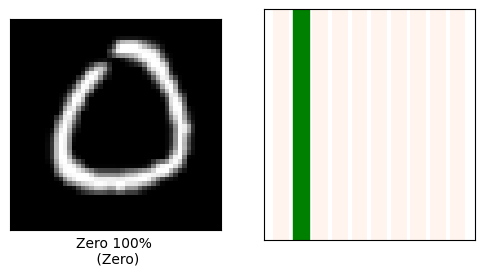

In [118]:
# call the function

# defining parameters to pass to function
i=random.randrange(1, len(val_images))
plt.figure(figsize=(6,3)) #figure size in inch
plt.subplot(1,2,1)
# we are passing "val_images_Original" just to show original image instead of "val_images"
# which is preprocessed as VGG16 process and used for prediction.
plot_image(i,predictions, val_image_label, val_images_Original)
plt.subplot(1,2,2)
plot_value_array(i, predictions, val_image_label)
plt.show()

Classification of using Transfer Learning (VGG16)

Predicted, Percentage, (Original)



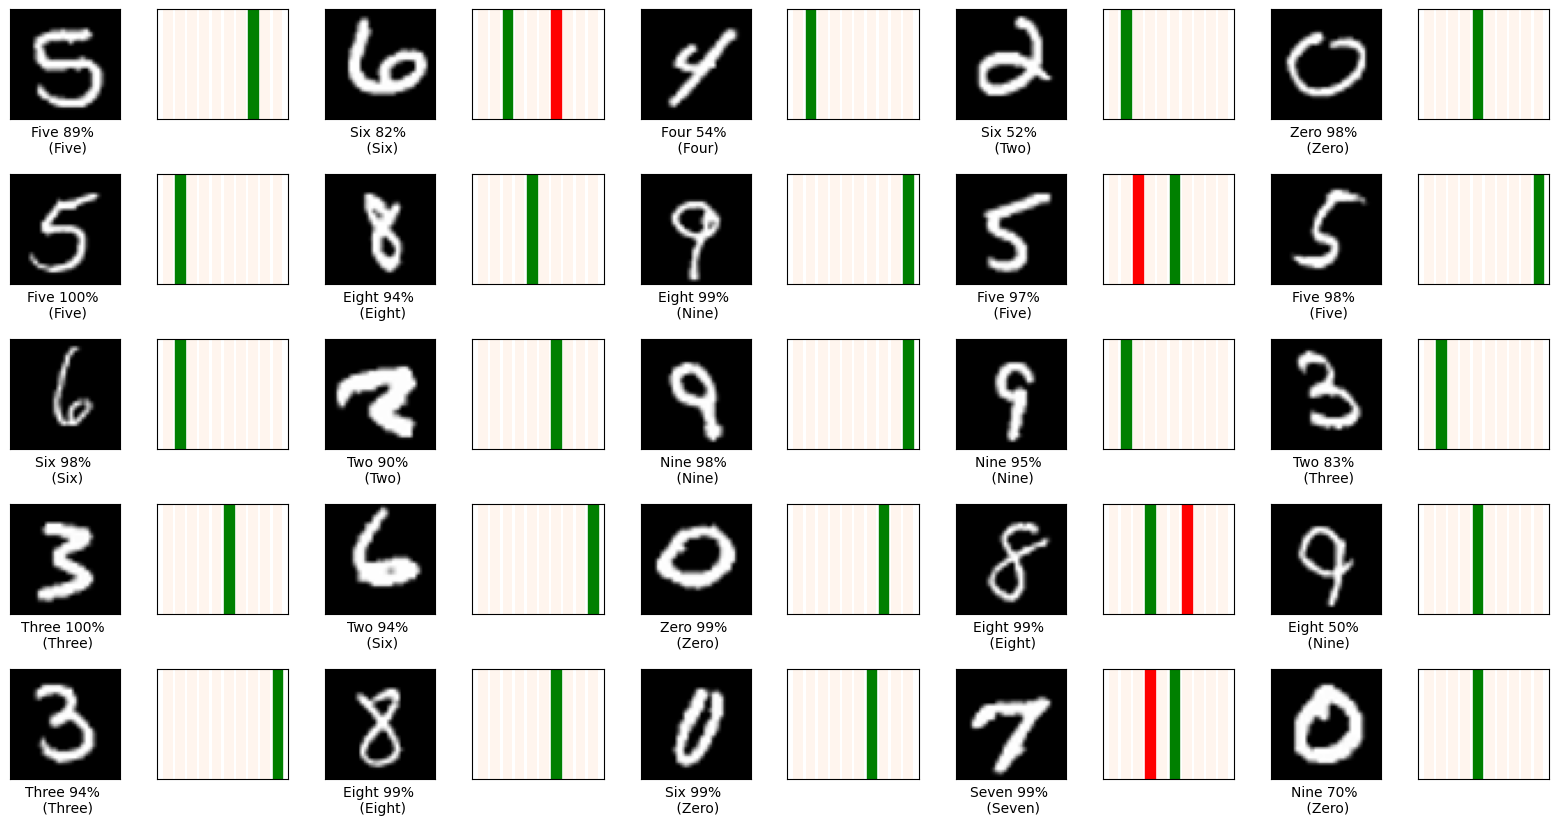

In [119]:
# Declaring variables
num_rows=5
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

print("Classification of using Transfer Learning (VGG16)\n")
print("Predicted, Percentage, (Original)\n")

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    ii=random.randrange(1,len(test_images))
    # we are passing "val_images_Original" just to show original image instead of "val_images"
    # which is preprocessed as VGG16 process and used for prediction.
    plot_image(ii,predictions, val_image_label, val_images_Original)

    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(i, predictions, val_image_label)
plt.subplots_adjust(hspace=0.5)
plt.show()

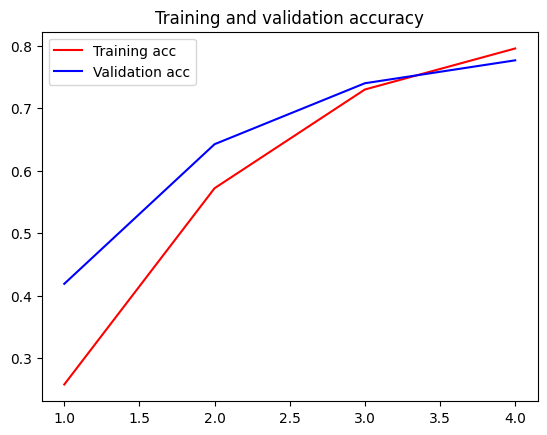

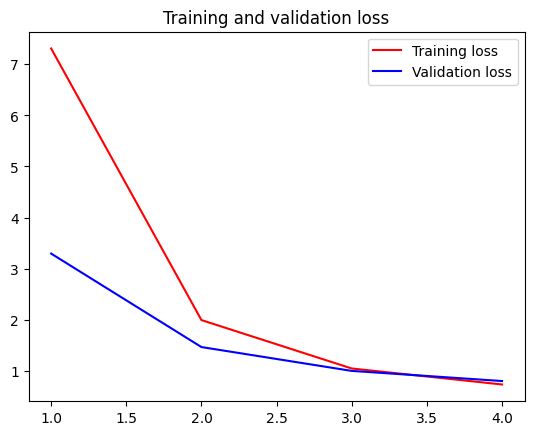

In [121]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [122]:
loss, acc = model.evaluate(xtest, ytest, batch_size=128)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10/10 [==============================] - 0s 35ms/step - loss: 0.7985 - accuracy: 0.7767

Test accuracy: 77.7%
